In [1]:
import umap
import umap.plot

/homes/jwuelfingen/anaconda3/envs/ts-bc/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/homes/jwuelfingen/anaconda3/envs/ts-bc/lib/python3.9/site-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


In [4]:
print(digits.data.shape)

(1797, 64)


In [6]:
digits.target.shape

(1797,)

In [7]:
import numpy as np

In [22]:
import matplotlib.pyplot as plt

In [9]:
episode_starts = np.load('weights/ts_bc/episode_starts.npy', allow_pickle=True)
latents_vpt = np.load('weights/ts_bc/latents_vpt.npy', allow_pickle=True)
print(episode_starts.shape, latents_vpt.shape)

(200, 2) (983849, 1024)


In [19]:
int(episode_starts[20][1])

96025

In [34]:
episode_starts[18][0]

'data/10.0/gimpy-jade-panda-2f151ca9898d-20220417-151304'

In [36]:
for i in range(20):
    print(episode_starts[i][0])

data/10.0/cheeky-cornflower-setter-f153ac423f61-20220418-184541
data/10.0/lovely-persimmon-angora-f153ac423f61-20220415-045912
data/10.0/trippy-red-llama-f153ac423f61-20220416-152415
data/10.0/lovely-persimmon-angora-f153ac423f61-20220418-203358
data/10.0/cheeky-cornflower-setter-b7219c8fae54-20220419-200634
data/10.0/squeaky-magnolia-ocelot-44552e98ff73-20220422-104536
data/10.0/shabby-viridian-beaver-6a733578ad80-20220422-212904
data/10.0/lovely-persimmon-angora-f153ac423f61-20220423-061503
data/10.0/gimpy-jade-panda-99eeca393629-20220417-141305
data/10.0/squeaky-magnolia-ocelot-f153ac423f61-20220420-143612
data/10.0/shabby-viridian-beaver-f2be760b6170-20220416-191209
data/10.0/shabby-pink-molly-90feff906c1d-20220424-113720
data/10.0/cheeky-cornflower-setter-181b0454f4f4-20220414-131435
data/10.0/lovely-persimmon-angora-8e1349148c0d-20220420-005836
data/10.0/cheeky-cornflower-setter-89d5c5c457f1-20220415-214246
data/10.0/lovely-persimmon-angora-e9d3643790ff-20220417-052002
data/10.0/

In [40]:
print(episode_starts[2][0])
print(episode_starts[3][0])
print(episode_starts[4][0])
print(episode_starts[6][0])
print(episode_starts[7][0])
print(episode_starts[9][0])

data/10.0/trippy-red-llama-f153ac423f61-20220416-152415
data/10.0/lovely-persimmon-angora-f153ac423f61-20220418-203358
data/10.0/cheeky-cornflower-setter-b7219c8fae54-20220419-200634
data/10.0/shabby-viridian-beaver-6a733578ad80-20220422-212904
data/10.0/lovely-persimmon-angora-f153ac423f61-20220423-061503
data/10.0/squeaky-magnolia-ocelot-f153ac423f61-20220420-143612


In [42]:
import requests
for i in range(10):
    response = requests.get('https://openaipublic.blob.core.windows.net/minecraft-rl/' + episode_starts[i][0] + '.jsonl')
    with open('umapData/' + episode_starts[i][0] + '.jsonl', 'wb') as f:
        f.write(response.content)

In [68]:
import json
yLevels = []
for i in range(10):
    with open('umapData/' + episode_starts[i][0] + '.jsonl', 'r') as f:
        actions = [json.loads(line) for line in f]
        for i in range(15, len(actions)):
            yLevels.append(int(actions[i]['ypos'] < 62))
        yLevels.append(int(actions[i]['ypos'] < 62))
len(yLevels)

46975

In [69]:
len(vid_ids[:int(episode_starts[10][1])])

46975

In [15]:
vid_ids = np.zeros((latents_vpt.shape[0],))
frames = list(map(lambda x: int(x), list(episode_starts[:, 1]))) + [latents_vpt.shape[0]]
for i in range(len(episode_starts)):
    vid_ids[frames[i]:frames[i+1]] = i

<Axes: >

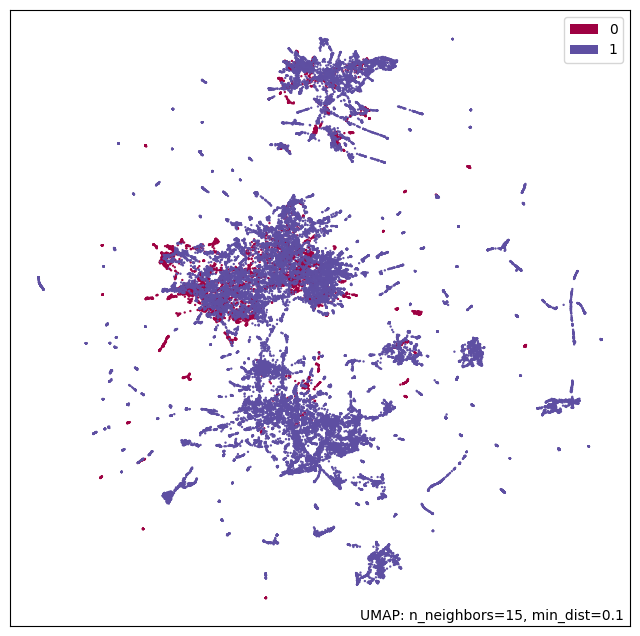

In [71]:
mapper = umap.UMAP().fit(latents_vpt[:int(episode_starts[10][1])])
umap.plot.points(mapper, labels=np.array(yLevels))

<Axes: >

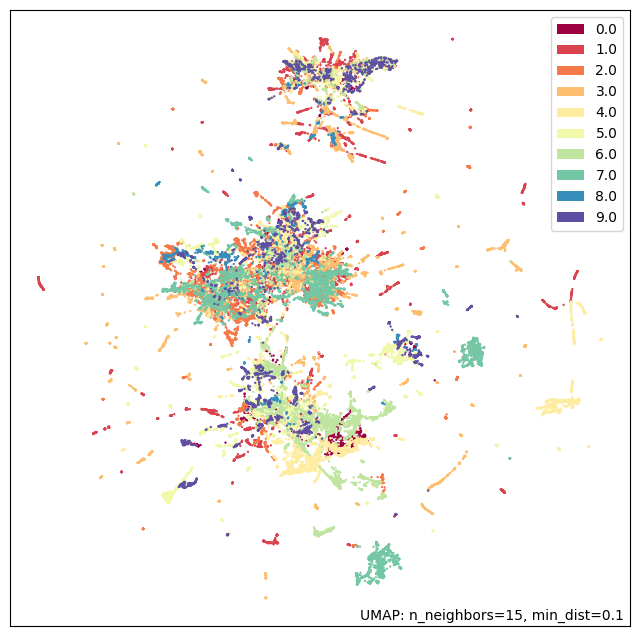

In [72]:
#mapper = umap.UMAP().fit(latents_vpt[:int(episode_starts[10][1])])
umap.plot.points(mapper, labels=vid_ids[:int(episode_starts[10][1])])

In [28]:
mapper = umap.UMAP().fit_transform(latents_vpt[:int(episode_starts[20][1])])

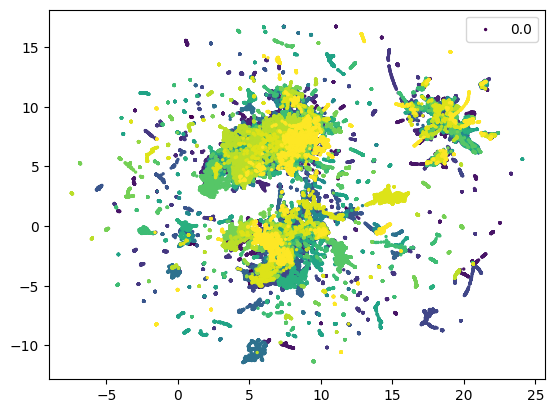

In [33]:
plt.scatter(mapper[:,0], mapper[:,1], c=vid_ids[:int(episode_starts[20][1])], s=2)
plt.legend(vid_ids[:int(episode_starts[20][1])])